# <center> Capítulo 05 - Econometria Básica - Gujarati e Porter </center>

***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#plt.style.use(['science', 'notebook', 'grid', 'dark_background'])
plt.style.use(['science', 'notebook', 'grid'])

## Resumo

- Os tópicos do capítulo são a estimação de intervalo e o teste de hipóteses na regressão linear simples.

***

> Cuidado para não testar hipóteses demais; quanto mais você tortura os dados, maior a probabilidade de que confessem, mas tal confissão pode não ser admissível no tribunal da opinião científica

- ***Erro do Tipo I***: consiste em rejeitar uma hipótese verdadeira.
- ***Erro do Tipo II***: consiste em aceitar uma hipótese falsa.

- Para realizar testes estatísticos na regressão, precisamos adotar a hipótese de que o ***termo de erro, $\hat{u}_i$, é distribuído normalmente***.
- ***Regra de decisão do intervalo de confiança:*** estabeleça um intervalo de confiança de $100(1 - \alpha)%$ para $\beta_i$. Se $\beta_i$ sob $H_0$ situar-se no intervalo de confiança, não rejeite $H_0$, mas, se cair fora desse intervalo, rejeite $H_0$.
  - Em estatística, quando rejeitamos a hipótese nula, dizemos que nossos resultados foram estatisticamente significativos. Por outro lado, quando não rejeitamos a hipótese nula, dizemos que nossos resultados não são estatisticamente significativos.
- ***Valor-p***: o valor p é definido como o ***menor nível de significância em que uma hipótese nula pode ser rejeitada***.
- ***Testes de normalidade***: $(i)$ histograma de resíduos; $(ii)$ representação de probabilidade normal, um artifício gráfico; e $(iii)$ o teste Jarque-Bera.


> O importante nessas considerações é que não devemos confundir significância estatística com
significância prática ou econômica. Como observa Goldberger:
>
>  > ...Quando uma hipótese nula, digamos $\beta_j = 1$, é especificada, o que se quer dizer é que $\beta_j$ está *próximo* de 1, tão próximo que para todos os fins pode ser tratado *como se fosse* 1. Mas o fato de 1,1 ser ...‘praticamente a mesma coisa que’... 1,0 é uma ***questão econômica***, não estatística. Não é possível decidir a questão baseando-se em um teste de hipóteses, porque o teste estatístico mede o coeficiente estimado em unidades de erro padrão, que não se prestam à medição do parâmetro econômico $\beta_j - 1$. Talvez seja uma boa ideia reservar o termo “significância” para o conceito estatístico e adotar ...“substancial”... para o conceito econômico...

## Exercícios Aplicados

***

### Exercício 5.9

In [3]:
df = pd.read_excel('dados/rem_1985.xlsx')
df.columns = ['obs', 'avg_wage', 'expenditure_st']
df.head()

,obs,avg_wage,expenditure_st
0,1,19583,3346
1,2,20263,3114
2,3,20325,3554
3,4,26800,4642
4,5,29470,4669


In [4]:
expenditure_st = sm.add_constant(df['expenditure_st'])

model = sm.OLS(df['avg_wage'], expenditure_st)
results = model.fit()

std_beta0 = np.sqrt(results.cov_params([1, 0]).iloc[0, 0])
std_beta1 = np.sqrt(results.cov_params([0, 1]).iloc[1, 1])
r = results.rsquared
sqr = results.ssr
sqe = results.ess

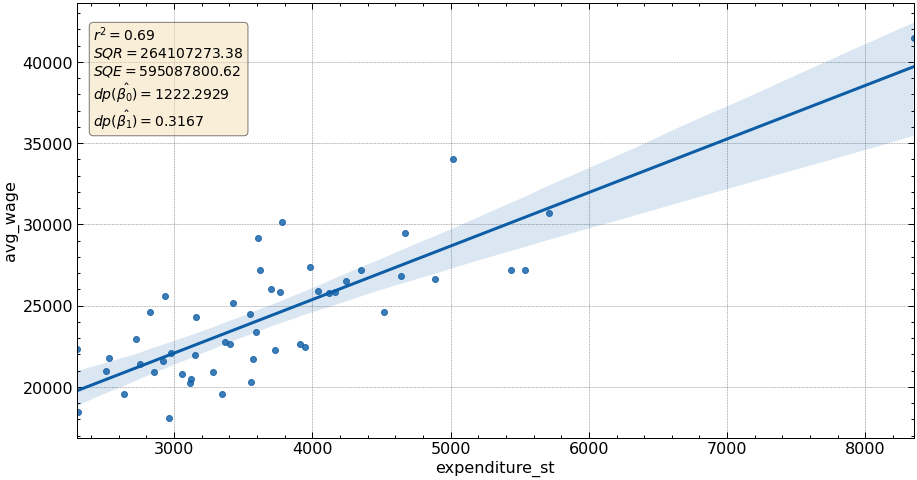

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.regplot(x='expenditure_st', y='avg_wage', data=df, ci=95, ax=ax)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join((
    fr'$r^2 = {r:.2f}$',
    fr'$SQR = {sqr:.2f}$',
    fr'$SQE = {sqe:.2f}$',
    fr'$dp(\hat{{\beta_0}}) = {std_beta0:.4f}$',
    fr'$dp(\hat{{\beta_1}}) = {std_beta1:.4f}$'))

ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.show()

In [ ]:
# Interpretar resultado
# Mostrar intervalo de confiança de 95%
# Teste-t que beta1 = 3
# Fazer previsão de valor e previsão de valor médio (estabelecer intervalos de confiança)
# Testar normalodade do termo de erro

In [7]:
t_test = results.t_test(([0, 1], 3))
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.2940      0.317      0.928      0.358       2.657       3.931


In [8]:
print(results.pvalues)

const             2.719374e-13
expenditure_st    6.911345e-14
dtype: float64


In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_wage   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     108.2
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           6.91e-14
Time:                        20:36:50   Log-Likelihood:                -457.94
No. Observations:                  50   AIC:                             919.9
Df Residuals:                      48   BIC:                             923.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.22e+04   1222.293      9.

In [32]:
print(results.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.686     
Dependent Variable:   avg_wage          AIC:                 919.8860  
Date:                 2022-06-10 11:21  BIC:                 923.7100  
No. Observations:     50                Log-Likelihood:      -457.94   
Df Model:             1                 F-statistic:         108.2     
Df Residuals:         48                Prob (F-statistic):  6.91e-14  
R-squared:            0.693             Scale:               5.5022e+06
-----------------------------------------------------------------------
                 Coef.     Std.Err.    t    P>|t|    [0.025    0.975]  
-----------------------------------------------------------------------
const          12196.4193 1222.2929  9.9783 0.0000 9738.8346 14654.0039
expenditure_st     3.2940    0.3167 10.3997 0.0000    2.6572     3.9309
-----------------------------------------------------------------------
Omnibus:    

In [6]:
results.cov_params()

,const,expenditure_st
const,1.494000e+06,-372.619972
expenditure_st,-3.726200e+02,0.100325


In [21]:
r_matrix = np.array([0, 1])
var1 = results.cov_params(r_matrix).iloc[1, 1]

In [26]:
var1 ** (1/2)

0.31674159468831836